<a href="https://colab.research.google.com/github/tandat-1305/Data-Analysis-with-Python/blob/main/Ph%C3%A2n%20lo%E1%BA%A1i%20r%C6%B0%E1%BB%A3u%20-%20Wine%20Classification/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
sns.set_style('whitegrid')

import scipy
import warnings
import random

import scipy
import warnings

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/tandat-1305/Data-Analysis-with-Python/main/Ph%C3%A2n%20lo%E1%BA%A1i%20r%C6%B0%E1%BB%A3u%20-%20Wine%20Classification/WineQT.csv")

# Data Exploration - Khám phá dữ liệu

Tạo kiểu cho bảng dữ liệu

In [8]:
df = data[data.columns]
cm = sns.light_palette("green", as_cmap=True)
df.head(30).style.background_gradient(cmap=cm)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5,0
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5,1
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5,2
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6,3
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5,4
5,7.400000,0.660000,0.000000,1.800000,0.075000,13.000000,40.000000,0.997800,3.510000,0.560000,9.400000,5,5
6,7.900000,0.600000,0.060000,1.600000,0.069000,15.000000,59.000000,0.996400,3.300000,0.460000,9.400000,5,6
7,7.300000,0.650000,0.000000,1.200000,0.065000,15.000000,21.000000,0.994600,3.390000,0.470000,10.000000,7,7
8,7.800000,0.580000,0.020000,2.000000,0.073000,9.000000,18.000000,0.996800,3.360000,0.570000,9.500000,7,8
9,6.700000,0.580000,0.080000,1.800000,0.097000,15.000000,65.000000,0.995900,3.280000,0.540000,9.200000,5,10


In [12]:
data[data.quality == 3].head(5).style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
324,11.600000,0.580000,0.660000,2.200000,0.074000,10.000000,47.000000,1.000800,3.250000,0.570000,9.000000,3,459
368,10.400000,0.610000,0.490000,2.100000,0.200000,5.000000,16.000000,0.999400,3.160000,0.630000,8.400000,3,517
922,7.600000,1.580000,0.000000,2.100000,0.137000,5.000000,9.000000,0.994760,3.500000,0.400000,10.900000,3,1299
1046,7.300000,0.980000,0.050000,2.100000,0.061000,20.000000,49.000000,0.997050,3.310000,0.550000,9.700000,3,1469
1055,7.100000,0.875000,0.050000,5.700000,0.082000,3.000000,14.000000,0.998080,3.400000,0.520000,10.200000,3,1478


In [20]:
data[data.quality == 4].head(5).style.background_gradient(cmap=sns.light_palette("#FA7E00", as_cmap=True))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
29,8.800000,0.610000,0.300000,2.800000,0.088000,17.000000,46.000000,0.997600,3.260000,0.510000,9.300000,4,41
32,4.600000,0.520000,0.150000,2.100000,0.054000,8.000000,65.000000,0.993400,3.900000,0.560000,13.100000,4,45
50,8.300000,0.675000,0.260000,2.100000,0.084000,11.000000,43.000000,0.997600,3.310000,0.530000,9.200000,4,73
54,8.300000,0.625000,0.200000,1.500000,0.080000,27.000000,119.000000,0.997200,3.160000,1.120000,9.100000,4,79
66,5.000000,1.020000,0.040000,1.400000,0.045000,41.000000,85.000000,0.993800,3.750000,0.480000,10.500000,4,94


In [19]:
data[data.quality == 5].head(5).style.background_gradient(cmap=sns.light_palette("#F7D136", as_cmap=True))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5,0
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5,1
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5,2
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5,4
5,7.400000,0.660000,0.000000,1.800000,0.075000,13.000000,40.000000,0.997800,3.510000,0.560000,9.400000,5,5


In [17]:
dataframe[dataframe.quality == 6].head(5).style.background_gradient(cmap=sns.light_palette("#529DFF", as_cmap=True))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6,3
13,7.900000,0.320000,0.510000,1.800000,0.341000,17.000000,56.000000,0.996900,3.040000,1.080000,9.200000,6,19
17,6.900000,0.400000,0.140000,2.400000,0.085000,21.000000,40.000000,0.996800,3.430000,0.630000,9.700000,6,24
21,7.800000,0.645000,0.000000,2.000000,0.082000,8.000000,16.000000,0.996400,3.380000,0.590000,9.800000,6,29
25,7.800000,0.645000,0.000000,5.500000,0.086000,5.000000,18.000000,0.998600,3.400000,0.550000,9.600000,6,35


In [22]:
dataframe[dataframe.quality == 7].head(5).style.background_gradient(cmap=sns.light_palette("#00FF00", as_cmap=True))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
7,7.300000,0.650000,0.000000,1.200000,0.065000,15.000000,21.000000,0.994600,3.390000,0.470000,10.000000,7,7
8,7.800000,0.580000,0.020000,2.000000,0.073000,9.000000,18.000000,0.996800,3.360000,0.570000,9.500000,7,8
12,8.500000,0.280000,0.560000,1.800000,0.092000,35.000000,103.000000,0.996900,3.300000,0.750000,10.500000,7,16
27,8.100000,0.380000,0.280000,2.100000,0.066000,13.000000,30.000000,0.996800,3.230000,0.730000,9.700000,7,37
89,8.000000,0.590000,0.160000,1.800000,0.065000,3.000000,16.000000,0.996200,3.420000,0.920000,10.500000,7,128


In [32]:
dataframe[dataframe.quality == 8].head(5).style.background_gradient(cmap=sns.light_palette("#E65FDB", as_cmap=True))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
190,7.900000,0.350000,0.460000,3.600000,0.078000,15.000000,37.000000,0.997300,3.350000,0.860000,12.800000,8,267
197,10.300000,0.320000,0.450000,6.400000,0.073000,5.000000,13.000000,0.997600,3.230000,0.820000,12.600000,8,278
271,5.600000,0.850000,0.050000,1.400000,0.045000,12.000000,88.000000,0.992400,3.560000,0.820000,12.900000,8,390
310,12.600000,0.310000,0.720000,2.200000,0.072000,6.000000,29.000000,0.998700,2.880000,0.820000,9.800000,8,440
321,11.300000,0.620000,0.670000,5.200000,0.086000,6.000000,19.000000,0.998800,3.220000,0.690000,13.400000,8,455


Thông tin dữ liệu

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [26]:
#kiểm tra thiếu hụt dữ liệu
pd.DataFrame(df.isnull().sum(), columns=["total"])

,total
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [28]:
#số giá trị trong cột
pd.DataFrame(data.nunique().sort_values(), columns=["value"])

,value
quality,6
free sulfur dioxide,53
alcohol,61
citric acid,77
residual sugar,80
pH,87
sulphates,89
fixed acidity,91
chlorides,131
volatile acidity,135


# Exploratory Data Analysis - Phân tích dữ liệu khám phá 

In [34]:
total = {}
for value in data.quality:
    if value not in total:
        total[value] = 0
    total[value] += 1
total

{3: 6, 4: 33, 5: 483, 6: 462, 7: 143, 8: 16}

In [33]:
features = df.columns
features = features[0:len(df.columns)-2]
print(f"Total features: {len(features)}")

Total features: 11


Tạo hàm random color

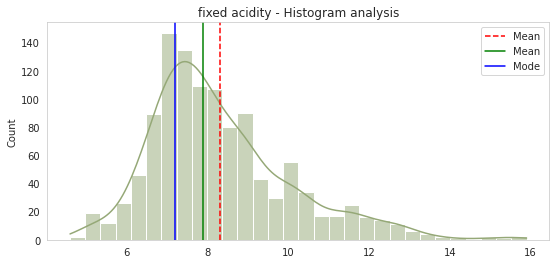

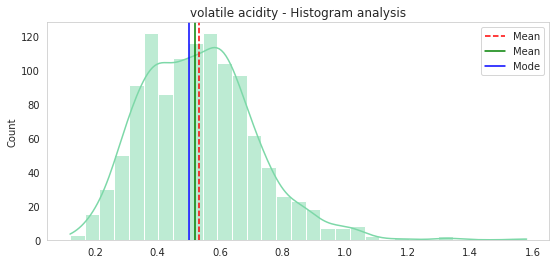

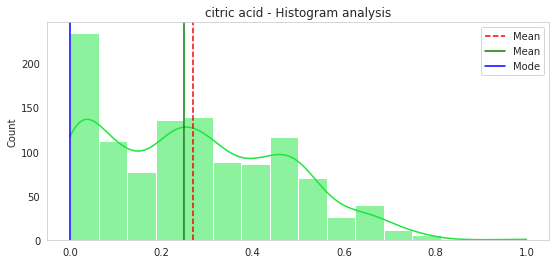

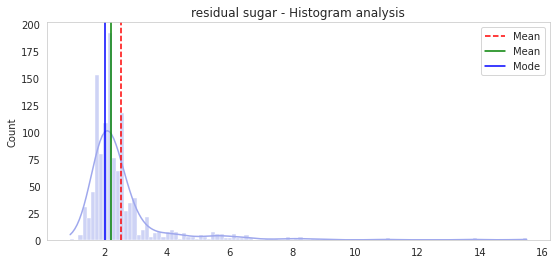

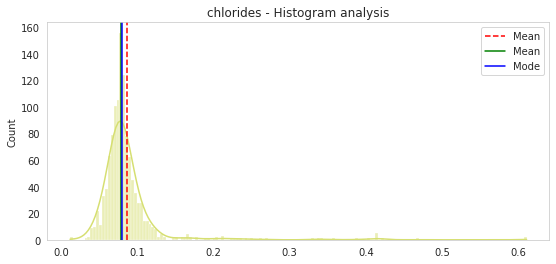

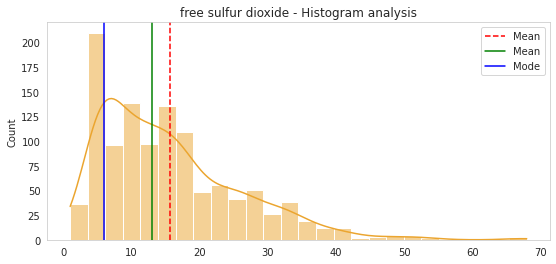

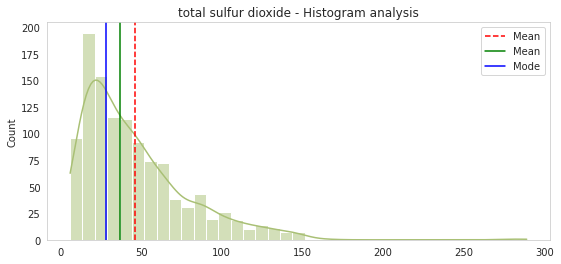

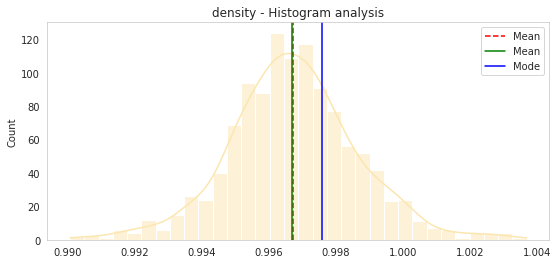

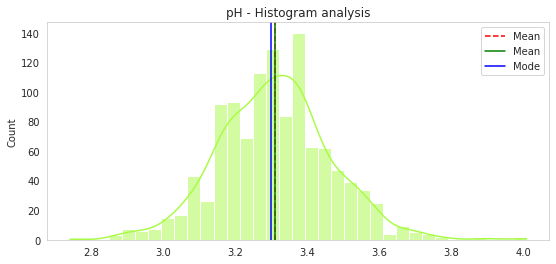

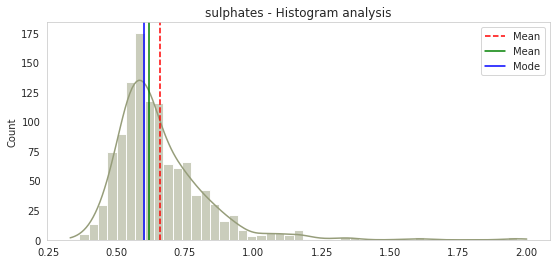

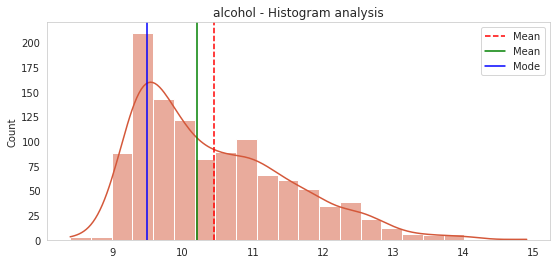

In [37]:
def get_random_color():
    r1 = lambda: random.randint(0,255)
    return '#%02X%02X%02X' % (r1(),r1(),r1())

def get_histplot_central_tendency(df: dict, fields: list):
    for field in fields:
        f, (ax1) = plt.subplots(1, 1, figsize=(9, 4))
        v_dist_1 = df[field].values
        sns.histplot(v_dist_1, ax=ax1, color=get_random_color(), kde=True)

        mean=df[field].mean()
        median=df[field].median()
        mode=df[field].mode().values[0]

        ax1.axvline(mean, color='r', linestyle='--', label="Mean")
        ax1.axvline(median, color='g', linestyle='-', label="Mean")
        ax1.axvline(mode, color='b', linestyle='-', label="Mode")
        ax1.legend()
        plt.grid()
        plt.title(f"{field} - Histogram analysis")

get_histplot_central_tendency(dataframe, features)

In [38]:
values = [vl for vl in total.values()]
names = [nm for nm in total]

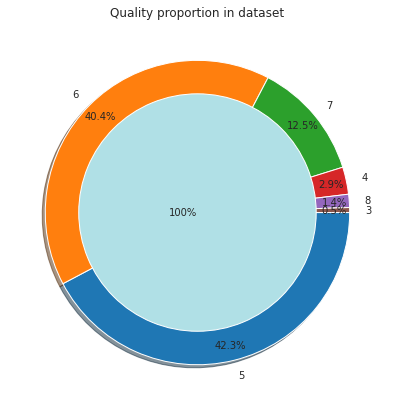

In [39]:
plt.figure(figsize=(7, 7))
plt.pie([values][0], radius = 1, shadow=True,
        labels=[names][0], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0,0,0,0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.title("Quality proportion in dataset")
plt.show()

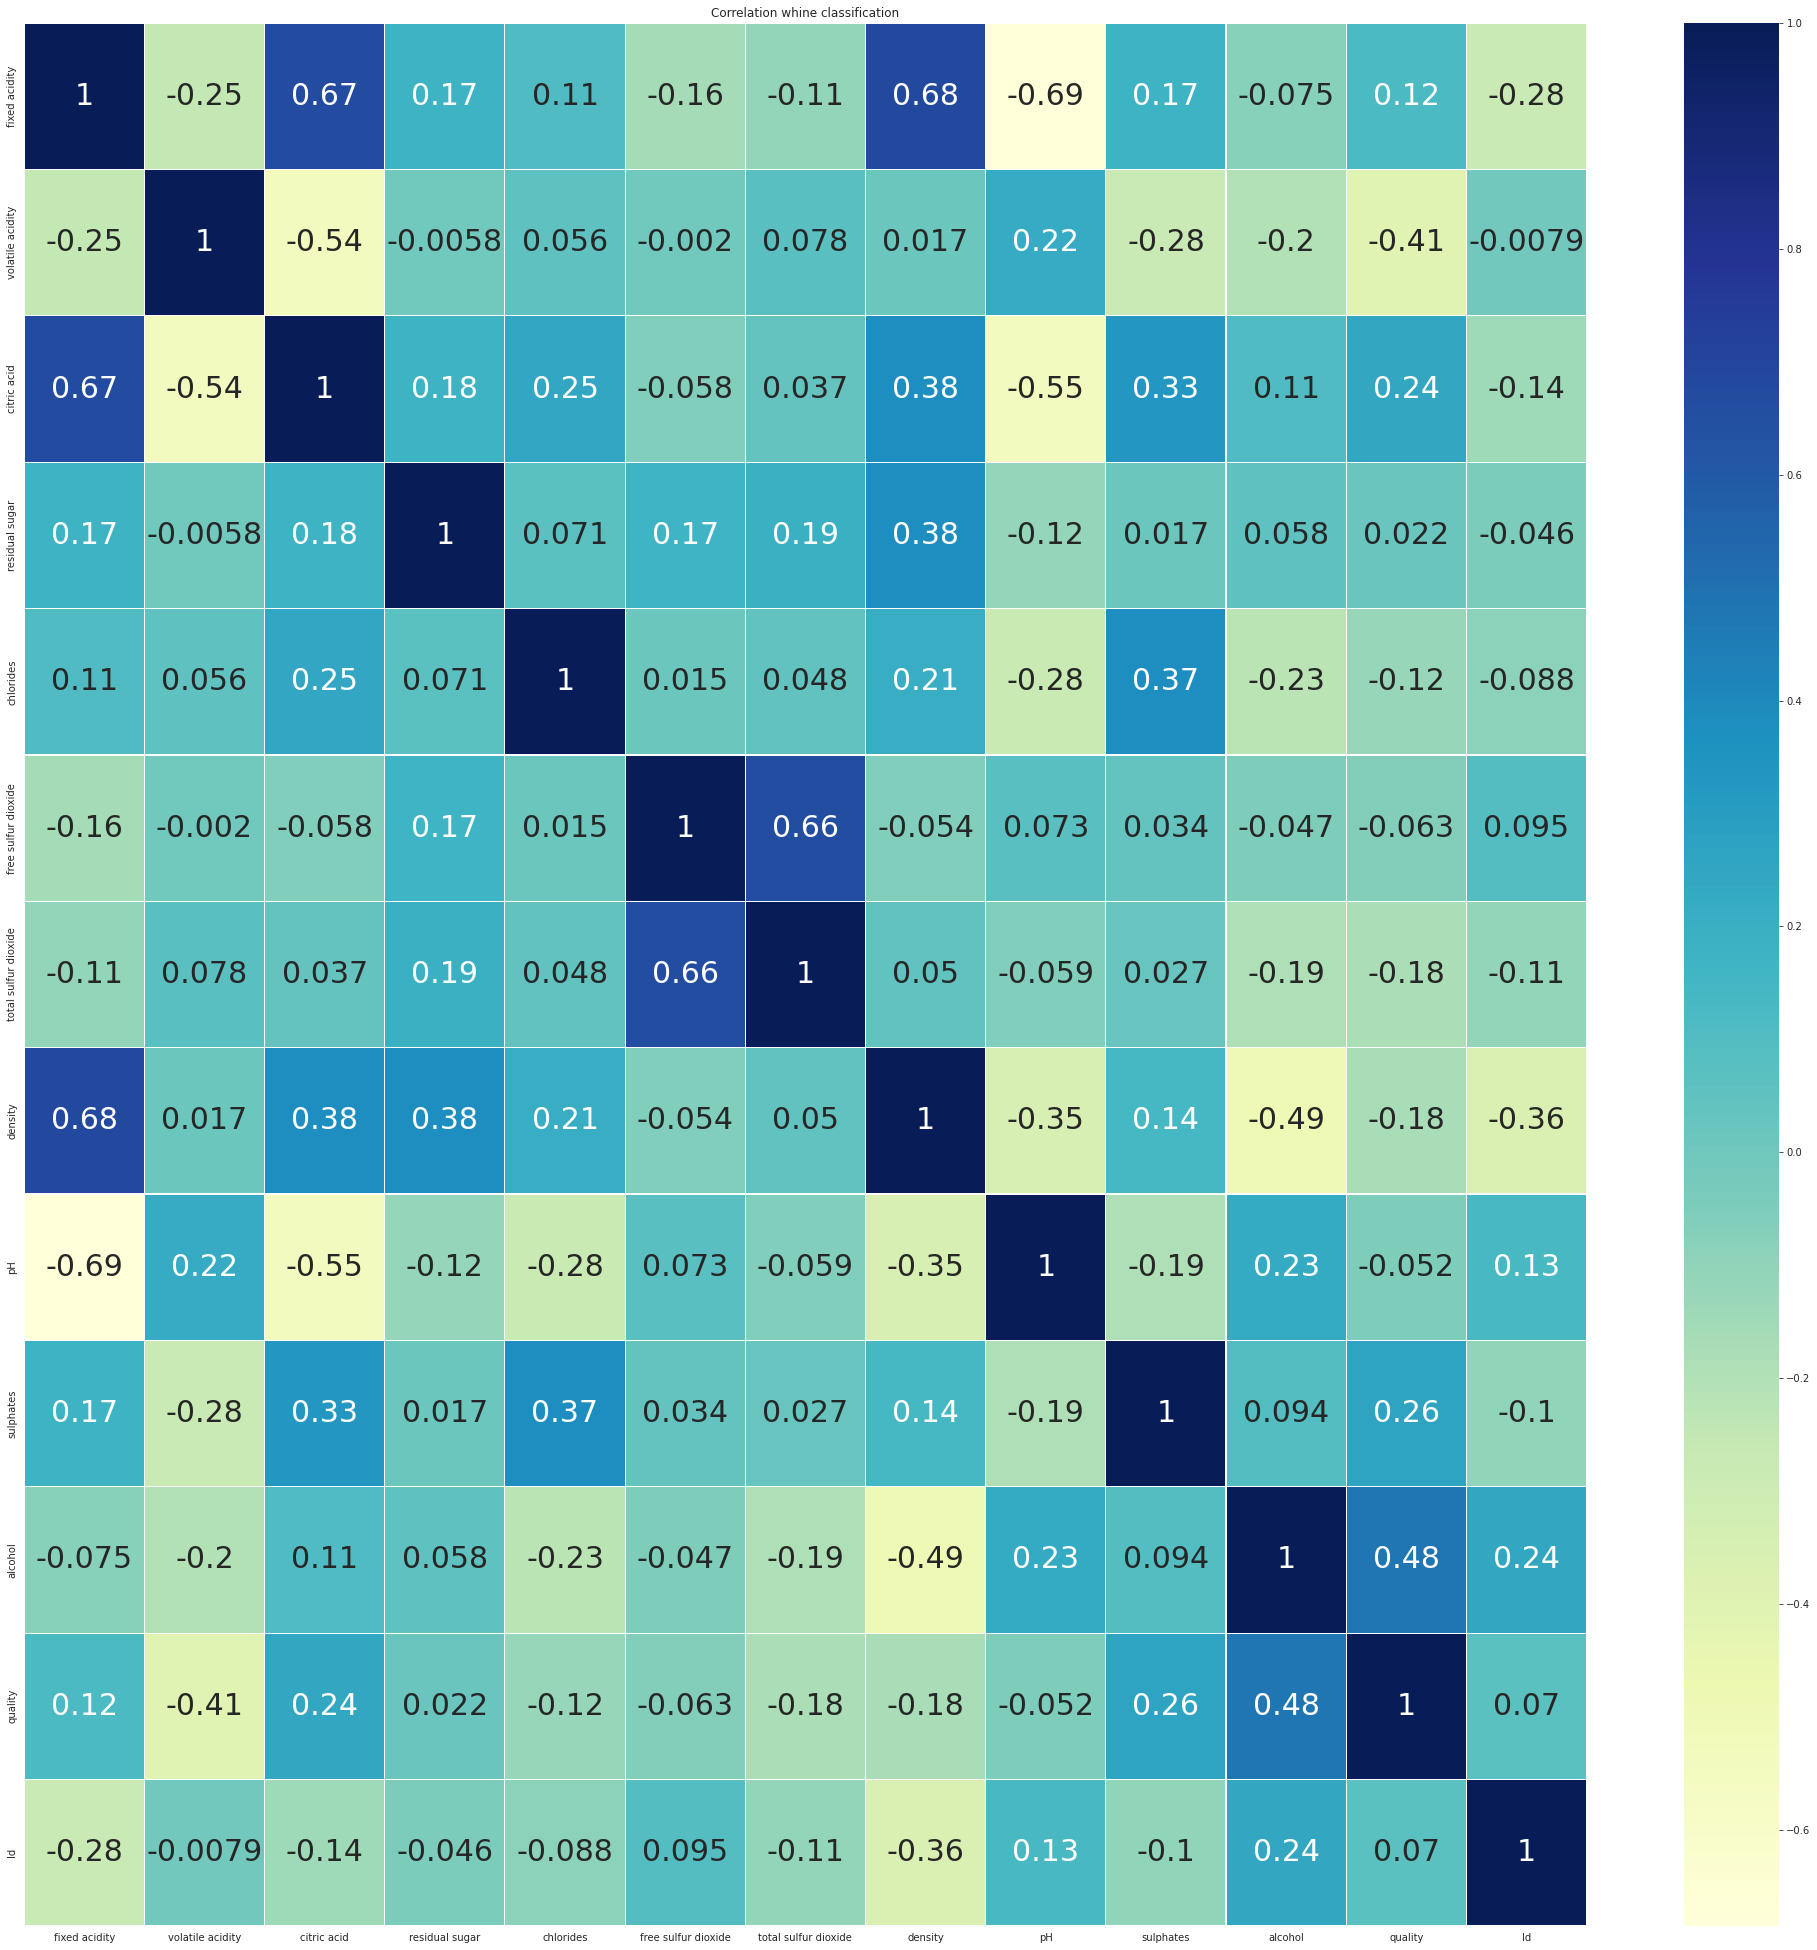

In [40]:
def get_headmap(df: dict):
    corr = df.corr()
    plt.figure(figsize=(35, 35))
    sns.heatmap(corr, annot=True, cmap="YlGnBu", linewidths=0.1, annot_kws={"fontsize":30})
    plt.title("Correlation whine classification")
    
get_headmap(dataframe)

In [41]:
print(f'Checking null values of the given dataset: \n{df.isnull().sum()}')

Checking null values of the given dataset: 
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [44]:
X = dataframe[features]
y = dataframe["quality"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(f"Training {X_train.shape}, Test {X_test.shape}")

Training (914, 11), Test (229, 11)


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print(' Train dataset after scaler')
pd.DataFrame(X_train).head(10).style.background_gradient(cmap=sns.light_palette("blue", as_cmap=True))

 Train dataset after scaler


,0,1,2,3,4,5,6,7,8,9,10
0,-0.114916,1.599705,-1.353491,1.166502,0.141077,-1.054490,-1.018405,0.960731,0.306891,-0.745688,-0.777651
1,-0.402836,2.043683,-1.048162,-0.019381,-0.180380,-1.054490,-1.147330,-0.015369,0.495737,-0.573707,-0.592405
2,-0.287668,0.267771,-1.251715,-0.389969,-0.300927,-0.665291,-0.889480,0.037680,0.306891,-0.516380,-0.870273
3,-0.345252,0.739498,-1.353491,-0.093499,0.040622,-0.762591,-0.857249,0.355973,-0.259645,0.400849,-1.055519
4,-0.978676,1.793946,-1.251715,-0.093499,-0.521929,-0.081491,-0.728324,-0.243479,1.439964,-0.344400,0.519070
5,-0.230084,2.820645,-1.099050,-0.241734,-0.079925,-0.276091,-0.534937,-0.439760,-0.574388,-0.631034,-0.499782
6,2.418781,-0.897671,1.445357,0.054737,-0.100016,0.891508,0.722082,1.470000,-1.015027,0.916790,-0.036667
7,0.633676,0.462012,0.071377,0.499443,-0.019651,0.210408,0.851007,1.788293,-0.007851,-0.745688,-0.685028
8,0.173004,1.655203,-1.353491,0.202972,0.141077,0.113108,-0.083699,0.790974,0.118046,-0.344400,-0.036667
9,0.288172,0.434263,-0.386616,1.092384,0.120986,1.378007,0.754314,0.605303,-0.574388,-0.917668,-0.407159


In [46]:
print(' Test dataset after scaler')
pd.DataFrame(X_test).head(10).style.background_gradient(cmap=sns.light_palette("orange", as_cmap=True))

 Test dataset after scaler


,0,1,2,3,4,5,6,7,8,9,10
0,0.807671,-0.789278,0.773353,-0.656978,-0.420493,-0.966100,-0.929536,-0.943545,-0.815773,-1.234956,0.869630
1,0.303855,-1.241281,1.485202,-0.403210,0.804536,1.119167,0.971491,0.175498,-0.340251,-0.775750,-0.690135
2,1.815305,-0.337275,0.824199,-0.693230,1.830141,2.112152,0.098047,0.783254,0.474928,1.389074,-0.506633
3,-0.311922,0.397230,-0.091035,-0.403210,-0.078625,1.615660,2.153211,-0.248966,-0.679909,-0.841351,-0.506633
4,-0.479860,-0.563277,0.112350,-0.258200,-0.591428,-0.866802,-0.903846,-0.861546,0.882518,0.470664,0.961381
5,0.863651,-1.184781,1.434356,-0.403210,-0.278048,-1.164697,-1.006604,-0.673431,-1.087499,0.536265,0.869630
6,-0.199962,0.623231,-0.294420,-0.113190,0.320222,-0.966100,-0.364365,-0.297201,0.406996,-0.447747,0.502627
7,4.054491,0.651481,1.078431,1.191900,0.348711,-0.469608,-0.621261,3.093693,-2.649926,0.601865,0.594377
8,1.871285,-0.450276,1.790280,-0.258200,-0.278048,-0.767503,-0.621261,1.448892,-0.679909,0.273862,0.410876
9,-0.143983,1.922740,-1.413040,-0.258200,0.035331,-0.469608,-0.415744,-0.084969,-0.408183,-0.972553,-0.598384


In [47]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimors': [100, 200, 300], 'max_depth':[14, 16, 18]}

model_xgb = XGBClassifier(learning_rate=0.3, n_estimators=300, max_depth=14, verbosity = 0)
clf = GridSearchCV(model_xgb, parameters)
print("Training ...")
clf.fit(X_train, y_train)
print("Training finished!")

Training ...
Training finished!


In [48]:
clf.cv_results_

{'mean_fit_time': array([1.96210108, 1.31158452, 1.38124552, 0.9798203 , 0.981809  ,
        0.98685641, 0.98901019, 0.98300047, 0.98151431]),
 'mean_score_time': array([0.02686696, 0.01772809, 0.02136192, 0.01423135, 0.01418543,
        0.0148397 , 0.01455255, 0.01421905, 0.01405559]),
 'mean_test_score': array([0.62582117, 0.62582117, 0.62582117, 0.64002882, 0.64002882,
        0.64002882, 0.62909986, 0.62909986, 0.62909986]),
 'param_max_depth': masked_array(data=[14, 14, 14, 16, 16, 16, 18, 18, 18],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimors': masked_array(data=[100, 200, 300, 100, 200, 300, 100, 200, 300],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 14, 'n_estimors': 100},
  {'max_depth': 14, 'n_estimors': 200},
  {

In [49]:
print(f'Best Score: {clf.best_score_}')
print(f'Best Hyperparameters: {clf.best_params_}')
model_xgb = XGBClassifier(**clf.best_params_)
model_xgb.fit(X_train, y_train)

Best Score: 0.640028823635381
Best Hyperparameters: {'max_depth': 16, 'n_estimors': 100}


XGBClassifier(max_depth=16, n_estimors=100, objective='multi:softprob')

In [50]:
y_pred = model_xgb.predict(X_test)
accuracy_score(y_test, y_pred)

0.6419213973799127

# Tài liệu tham khảo



*   https://www.geeksforgeeks.org/set-pandas-dataframe-background-color-and-font-color-in-python/
*   

